In [167]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Computer_Science_Files/NUS_courses/Applied_Machine_Learning/Applied_ML/Practical' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Computer_Science_Files/NUS_courses/Applied_Machine_Learning/Applied_ML/Practical


# Classification

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [170]:
X = diabetes.drop(['Outcome'], axis =1)
y = diabetes.Outcome

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [172]:
#Scaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [173]:
X_train.shape

(537, 8)

In [174]:
# Define the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape = (8,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [175]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 20)                180       
                                                                 
 dense_58 (Dense)            (None, 20)                420       
                                                                 
 dense_59 (Dense)            (None, 1)                 21        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [176]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [177]:
# fit the keras model on the dataset

history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data = (X_test, y_test))

Epoch 1/500
11/11 [==============================] - 1s 30ms/step - loss: 0.6902 - accuracy: 0.5810 - val_loss: 0.6773 - val_accuracy: 0.6234
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 0.6633 - accuracy: 0.6555 - val_loss: 0.6528 - val_accuracy: 0.6710
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 0.6394 - accuracy: 0.6834 - val_loss: 0.6316 - val_accuracy: 0.6883
Epoch 4/500
11/11 [==============================] - 0s 10ms/step - loss: 0.6179 - accuracy: 0.7002 - val_loss: 0.6123 - val_accuracy: 0.7100
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 0.5986 - accuracy: 0.7225 - val_loss: 0.5940 - val_accuracy: 0.7143
Epoch 6/500
11/11 [==============================] - 0s 12ms/step - loss: 0.5813 - accuracy: 0.7337 - val_loss: 0.5775 - val_accuracy: 0.7273
Epoch 7/500
11/11 [==============================] - 0s 9ms/step - loss: 0.5645 - accuracy: 0.7467 - val_loss: 0.5625 - val_accuracy: 0.7186
Epoch 8/50

In [178]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

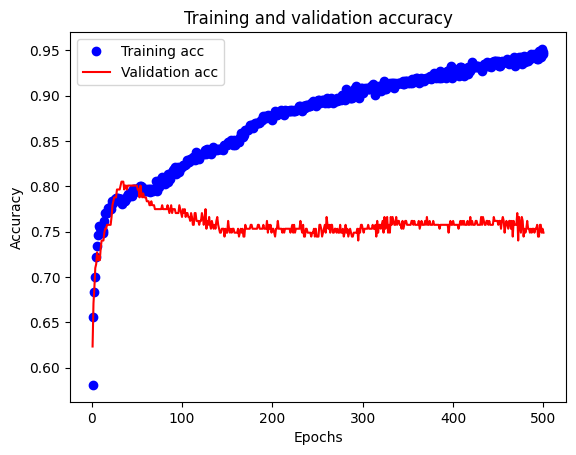

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [180]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('train acuracy: ', train_acc)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test acuracy: ', test_acc)

train acuracy:  0.947858452796936
test acuracy:  0.7489177584648132


# Exercise
Try to improve the model performance (e.g. test accuracy) by adjusting the model hyperparameters. E.g. the number of neurons, the number of epochs, batch size, optimizer learning rate and etc.

In [181]:
X_train.shape

(537, 8)

In [182]:
# Define the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape = (8,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [183]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                180       
                                                                 
 dense_61 (Dense)            (None, 20)                420       
                                                                 
 dense_62 (Dense)            (None, 1)                 21        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [184]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=250, batch_size=50, validation_data = (X_test, y_test))

Epoch 1/250
11/11 [==============================] - 2s 40ms/step - loss: 0.6256 - accuracy: 0.6592 - val_loss: 0.5746 - val_accuracy: 0.7316
Epoch 2/250
11/11 [==============================] - 0s 11ms/step - loss: 0.5959 - accuracy: 0.6778 - val_loss: 0.5513 - val_accuracy: 0.7359
Epoch 3/250
11/11 [==============================] - 0s 11ms/step - loss: 0.5734 - accuracy: 0.6778 - val_loss: 0.5346 - val_accuracy: 0.7316
Epoch 4/250
11/11 [==============================] - 0s 16ms/step - loss: 0.5563 - accuracy: 0.6872 - val_loss: 0.5213 - val_accuracy: 0.7403
Epoch 5/250
11/11 [==============================] - 0s 7ms/step - loss: 0.5432 - accuracy: 0.7188 - val_loss: 0.5103 - val_accuracy: 0.7359
Epoch 6/250
11/11 [==============================] - 0s 6ms/step - loss: 0.5310 - accuracy: 0.7188 - val_loss: 0.5027 - val_accuracy: 0.7489
Epoch 7/250
11/11 [==============================] - 0s 7ms/step - loss: 0.5219 - accuracy: 0.7207 - val_loss: 0.4962 - val_accuracy: 0.7446
Epoch 8/2

In [185]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

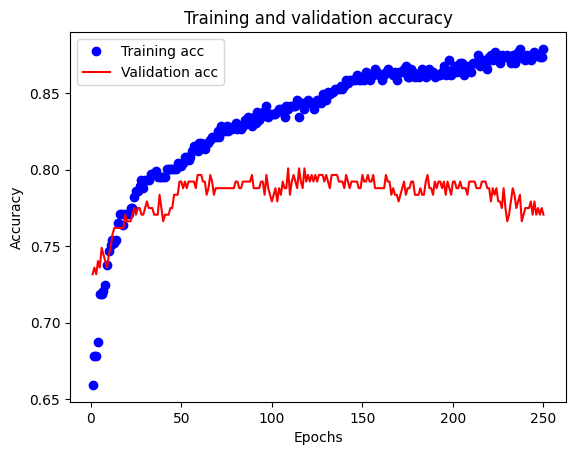

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [187]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('train acuracy: ', train_acc)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test acuracy: ', test_acc)

train acuracy:  0.8770949840545654
test acuracy:  0.7705627679824829


Validation accuracy is stable at 77%, an increase from 73% in the previous model when reducing epochs from 500 to 250 in order to prevent overfitting from the model learning too much from the training data.

# Regression

In [188]:
# define the dataset
m = 500
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)


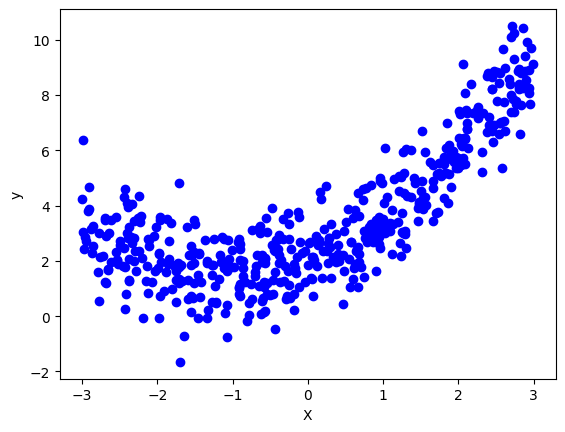

In [189]:
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [191]:
X_train.shape

(400, 1)

In [192]:
# Define the ANN model
model = Sequential()
model.add(Dense(15, activation='relu', input_shape = (1,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))

In [193]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [194]:
# fit the model on the dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data = (X_test, y_test))

Epoch 1/100
14/14 [==============================] - 1s 21ms/step - loss: 18.8631 - mae: 3.5876 - val_loss: 22.2397 - val_mae: 3.8730
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 17.7613 - mae: 3.4791 - val_loss: 20.9564 - val_mae: 3.7519
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 16.5448 - mae: 3.3410 - val_loss: 19.2678 - val_mae: 3.5739
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 14.9642 - mae: 3.1436 - val_loss: 17.3082 - val_mae: 3.3429
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 13.0274 - mae: 2.8778 - val_loss: 14.8218 - val_mae: 3.0464
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 11.0794 - mae: 2.5986 - val_loss: 12.6820 - val_mae: 2.7677
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 9.4295 - mae: 2.3583 - val_loss: 10.8596 - val_mae: 2.5211
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - lo

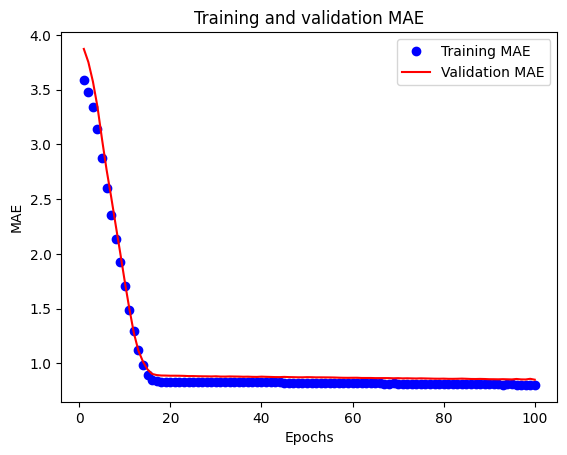

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

4/4 [==============================] - 0s 6ms/step


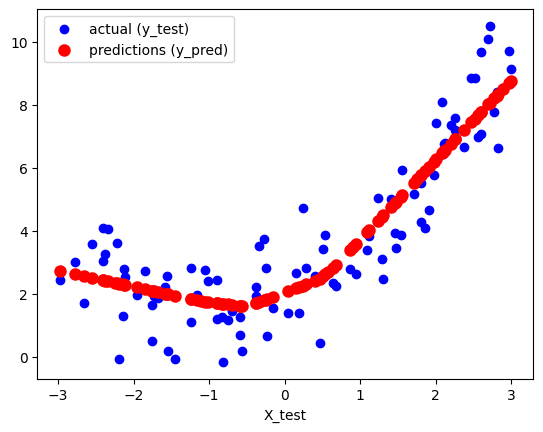

In [196]:
#use the model to make prediction on test data
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label ='actual (y_test)')
plt.scatter(X_test, y_pred, color='red', label='predictions (y_pred)', linewidth=3)
plt.xlabel('X_test')
plt.legend(loc='upper left')
plt.show()

In [197]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.849622840736202
Mean Squared Error: 1.1268921597234405
Root Mean Squared Error: 1.0615517696859822
R Squared Value: 0.8368826232436568


# Exercise
Use the HDB dataset and build an ANN model to predict resale price

In [198]:
dataset = pd.read_csv("resale-sample.csv")
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0
...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0


In [199]:
mapping = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3,'EXECUTIVE':4,'MULTI-GENERATION':5}

In [200]:
dataset['flat_type_num'] = dataset['flat_type'].map(mapping)
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_type_num
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0,2
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0,1
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0,4
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0,1
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0,1
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0,2
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0,2
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0,2


In [201]:
X = dataset[['floor_area_sqm', 'flat_type_num', 'lease_commence_date']]
y = dataset['resale_price'].values

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [203]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [204]:
X_train.shape

(1600, 3)

In [229]:
# Define the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape = (3,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [233]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# fit the model on the dataset
history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data = (X_test, y_test))

Epoch 1/500
32/32 [==============================] - 2s 13ms/step - loss: 16564847616.0000 - mae: 97746.3906 - val_loss: 18166851584.0000 - val_mae: 100318.8594
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 16440080384.0000 - mae: 97329.0703 - val_loss: 18038595584.0000 - val_mae: 99901.7031
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 16321404928.0000 - mae: 96923.4531 - val_loss: 17910052864.0000 - val_mae: 99482.7266
Epoch 4/500
32/32 [==============================] - 0s 5ms/step - loss: 16204398592.0000 - mae: 96526.1016 - val_loss: 17786365952.0000 - val_mae: 99067.3672
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 16088778752.0000 - mae: 96107.6328 - val_loss: 17671006208.0000 - val_mae: 98662.0000
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 15976699904.0000 - mae: 95721.2188 - val_loss: 17547059200.0000 - val_mae: 98268.4375
Epoch 7/500
32/32 [=========================

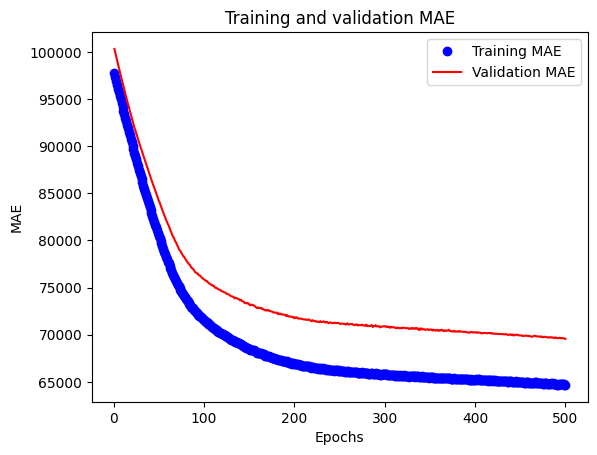

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [236]:
y_pred = model.predict(X_test)


13/13 [==============================] - 0s 2ms/step


In [237]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 69549.189296875
Mean Squared Error: 9270020895.492615
Root Mean Squared Error: 96280.94772847126
R Squared Value: 0.44719991433923256


In [238]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('train acuracy: ', train_acc)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test acuracy: ', test_acc)

train acuracy:  64640.625
test acuracy:  69549.1875
